# Для самостоятельного задания всех функций

In [1]:
#Велосипед, если не установлен модуль
try:
    from tqdm import tqdm
except:
    !pip install tqdm
    from tqdm import tqdm




import functions as f
import func_generator as fg


from GA import GA
import PARAMS as P
from Base import Base


import random
import numpy as np
from matplotlib import pyplot as plt


######################################################################################
func_list = np.array([f.linear, f.sin, f.ln, f.sqrt, f.my_abs, f.sqr, f.hyper])#, f.exp])

# Настройка области определения

In [2]:
#Граници по оси Х
left_border = 0 #от
right_border = 100 #до


##########
interval = [left_border, right_border]

# Генерация функции

 +1.0000000000 × (1.000000x +0.000000) 
 +10.0000000000 × sin(1.000000x +0.000000) 
 +0.000000


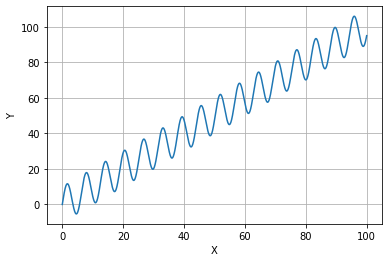

In [3]:
# ax - на это число будет умножаться х
# dx - прибавляется к ax*x
# a - на это число умножается рез-тат
# dy - смещение по оси y
### т.е. f(x) = a*h(ax*x+dx) + dy    (h - базовая ф-я... выбирается выше)

#0 - прямая
ax0 = 1.
dx0 = 0.
a0  = 1
dy0 = 0

#1- синус
ax1 = 1.
dx1 = 0.
a1  = 10
dy1 = 0

#2 - логарифм
ax2 = 0.
dx2 = 0.
a2  = 0
dy2 = 0

#3 - квадратный корень
ax3 = 0.
dx3 = 0.
a3  = 0
dy3 = 0

#4 - модуль
ax4 = 0.
dx4 = 0.
a4  = 0
dy4 = 0

#5 - квадрат
ax5 = 0.
dx5 = 0.
a5  = 0
dy5 = 0

#6 - куб
ax6 = 0.
dx6 = 0.
a6  = 0
dy6 = 0

#7 - экспонента
ax7 = 0.
dx7 = 0.
a7  = 0
dy7 = 0



##############################
##############################
#Генерируем саму ф-ю
f_genotip = [
    [dx0, ax0, a0, dy0],
    [dx1, ax1, a1, dy1],
    [dx2, ax2, a2, dy2],
    [dx3, ax3, a3, dy3],
    [dx4, ax4, a4, dy4],
    [dx5, ax5, a5, dy5],
    [dx6, ax6, a6, dy6],
    [dx7, ax7, a7, dy7],
    
]
f = Base["funcs"]["assembly"](f_genotip, func_list)


#Кусок для написания получившейся функции
h_str = ''
dy = 0
for hrom, func in zip(f_genotip, func_list):
    if hrom[2]==0: continue

    dy += hrom[-1]
    h_str += ' {:+3.10f} × {} \n'.format(
        hrom[2], 
        P.func_name[func].format('{:-3.6f}x {:+3.6f}'.format(hrom[1],hrom[0]))
    )
print(h_str + ' {:+3.6f}'.format(dy))

plt.grid()
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(np.linspace(interval[0],interval[1],10000),
         [f(x) for x in np.linspace(interval[0],interval[1],10000)]
)
plt.show()

# Настройка генерации датасета

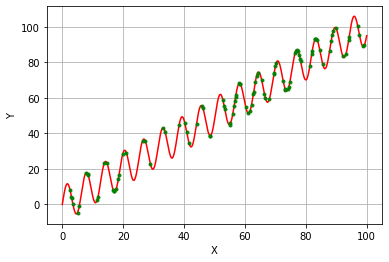

In [4]:
dots_count = 100   # число точек в датасете
noise      = 0.05   # величина шума (чем больше - тем зашумлённей данные)



####################
# Создаём датасет
data = fg.generate_dataset(f, dots_count = dots_count, x_range = interval, noise_ratio = noise)

plt.grid()
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(np.linspace(interval[0],interval[1],10000),
         [f(x) for x in np.linspace(interval[0],interval[1],10000)],
         'r'
)
plt.plot(data[0], data[1], '.g', alpha = 0.9)
plt.show()

# Задание параметров алгоритма

Инструкция по настройке:
tip - какой вариант алгоритма будет использоваться, может принимать значения:
- 0 - первая версия (выбираем 2 лучших представителя, делаем кучу копий, в каждой копии заменяем по одному нуклеотиду)
- 1 - Канонический ГА
- 2 - Генитор
- 3 - СНС
- 4 - С нефиксированным размером популяции (оооооооооочень медленный)

steps - число итераций в алгоритме

100%|██████████| 10000/10000 [04:41<00:00, 35.55it/s]


h(x) =   +0.9889152863 × (0.690836x -0.026104) 
 +10.0344459493 × sin(0.999176x +0.045037) 
 +1.5545829260 × ln(0.226886x +3.235580) 
 +0.7364234119 × √(2.866949x +2.641340) 
 +0.0092452554 × |2.259515x +0.048987| 
 +0.5145773018 × (0.325588x +1.459320)² 
 +1.4274721012 × (0.085222x +0.905453)³ 
 -6.560276

Значение целевой функции:
h_pr = [10.63812194];
f_pr = [0.19307265]

СКО:
h_sko = [0.32616134];
f_sko = [0.04394003]


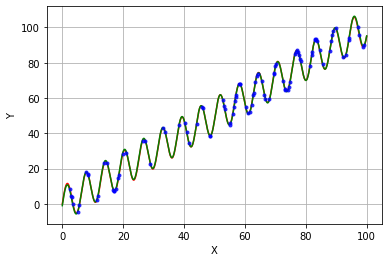

In [5]:
tip = 2 #от 0 до 4
steps = 10000


##########################################################
##########################################################
##########################################################
h, h_pr, h_str = Base["funcs"]["Go"](GA[tip], func_list, data, steps)

X = np.linspace(interval[0], interval[1], 10000)
fY = [f(x) for x in X]
hY = [h(x) for x in X]

plt.grid()
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(X, fY, 'r')
plt.plot(X, hY, 'g', alpha = 0.99)
plt.plot(data[0], data[1], '.b', alpha = 0.75)

print('h(x) = ', h_str)

print("\nЗначение целевой функции:")
print('h_pr = {};\nf_pr = {}'.format(h_pr, Base["funcs"]["E"](data[1],[f(x)for x in data[0]])))

print("\nСКО:")
print('h_sko = {};\nf_sko = {}'.format(
    (h_pr/len(data[0]))**0.5, 
    (Base["funcs"]["E"](data[1],[f(x)for x in data[0]])/len(data[0]))**0.5
))

plt.show()